In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import pandas as pd

In [2]:
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9am       12162 non-null  float64
 18  Cloud3

In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            447
MaxTemp            327
Rainfall           502
Evaporation      14380
Sunshine         17024
WindGustDir       3684
WindGustSpeed     3682
WindDir9am        2981
WindDir3pm        1873
WindSpeed9am       711
WindSpeed3pm      1390
Humidity9am        492
Humidity3pm       1186
Pressure9am       3590
Pressure3pm       3586
Cloud9am          9738
Cloud3pm         10050
Temp9am            349
Temp3pm           1037
RainToday          502
RainTomorrow       502
dtype: int64

In [5]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.707625,0.103173,0.420740,-0.086275,0.371407,0.274618,0.216490,-0.124533,0.121076,-0.473535,-0.447598,0.144629,0.156849,0.895459,0.670874
MaxTemp,0.707625,1.000000,-0.093857,0.581449,0.398926,0.221956,0.100066,0.052421,-0.434521,-0.454308,-0.392820,-0.458478,-0.253434,-0.174421,0.863069,0.980733
Rainfall,0.103173,-0.093857,1.000000,-0.058390,-0.254453,0.159611,0.116435,0.070967,0.239158,0.259171,-0.107624,-0.067322,0.217446,0.171308,-0.002130,-0.096920
Evaporation,0.420740,0.581449,-0.058390,1.000000,0.264683,0.229387,0.239560,-0.013931,-0.443903,-0.386690,-0.265387,-0.292890,-0.125143,-0.064028,0.483886,0.572358
Sunshine,-0.086275,0.398926,-0.254453,0.264683,1.000000,-0.069207,-0.025484,-0.043816,-0.546938,-0.634263,0.018348,-0.035323,-0.751510,-0.708638,0.200011,0.432558
WindGustSpeed,0.371407,0.221956,0.159611,0.229387,-0.069207,1.000000,0.537259,0.665219,-0.195638,0.027584,-0.431198,-0.402144,0.028899,0.094156,0.344677,0.176003
WindSpeed9am,0.274618,0.100066,0.116435,0.239560,-0.025484,0.537259,1.000000,0.457764,-0.294218,-0.040549,-0.177725,-0.134072,-0.038360,0.041079,0.236234,0.096433
WindSpeed3pm,0.216490,0.052421,0.070967,-0.013931,-0.043816,0.665219,0.457764,1.000000,-0.126952,0.080323,-0.264684,-0.220749,0.002444,-0.010376,0.207578,0.023086
Humidity9am,-0.124533,-0.434521,0.239158,-0.443903,-0.546938,-0.195638,-0.294218,-0.126952,1.000000,0.679120,0.152146,0.180594,0.502274,0.363253,-0.388158,-0.440651
Humidity3pm,0.121076,-0.454308,0.259171,-0.386690,-0.634263,0.027584,-0.040549,0.080323,0.679120,1.000000,0.042028,0.113440,0.534856,0.510644,-0.122851,-0.516314


In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,21453.000000,21573.000000,21398.000000,7520.000000,4876.000000,18218.000000,21189.000000,20510.000000,21408.000000,20714.000000,18310.000000,18314.000000,12162.000000,11850.000000,21551.000000,20863.000000
mean,13.030634,24.226283,2.628391,6.146130,8.119032,37.645461,12.363585,16.595953,69.244021,51.306894,1018.240573,1015.593404,4.129666,4.342194,17.878061,22.730533
std,5.987940,6.320662,9.749826,5.262074,3.762443,13.118763,9.047347,9.193030,18.090502,21.436391,6.574577,6.502107,3.033737,2.756305,5.580146,6.157241
min,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.500000,19.500000,0.000000,3.000000,5.800000,28.000000,6.000000,9.000000,57.000000,35.000000,1013.800000,1011.200000,1.000000,1.000000,13.900000,18.100000
50%,13.500000,23.700000,0.000000,4.800000,9.300000,35.000000,11.000000,15.000000,70.000000,52.000000,1018.300000,1015.600000,4.000000,5.000000,18.300000,22.100000
75%,17.900000,28.200000,0.600000,8.000000,10.900000,44.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.000000,7.000000,7.000000,22.000000,26.600000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000


In [7]:
data["RainTomorrow"].value_counts()

No     16801
Yes     4597
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

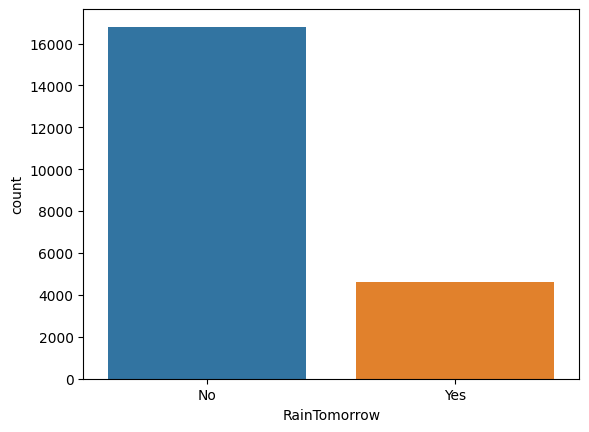

In [8]:
sns.countplot(x= data["RainTomorrow"])

<Axes: >

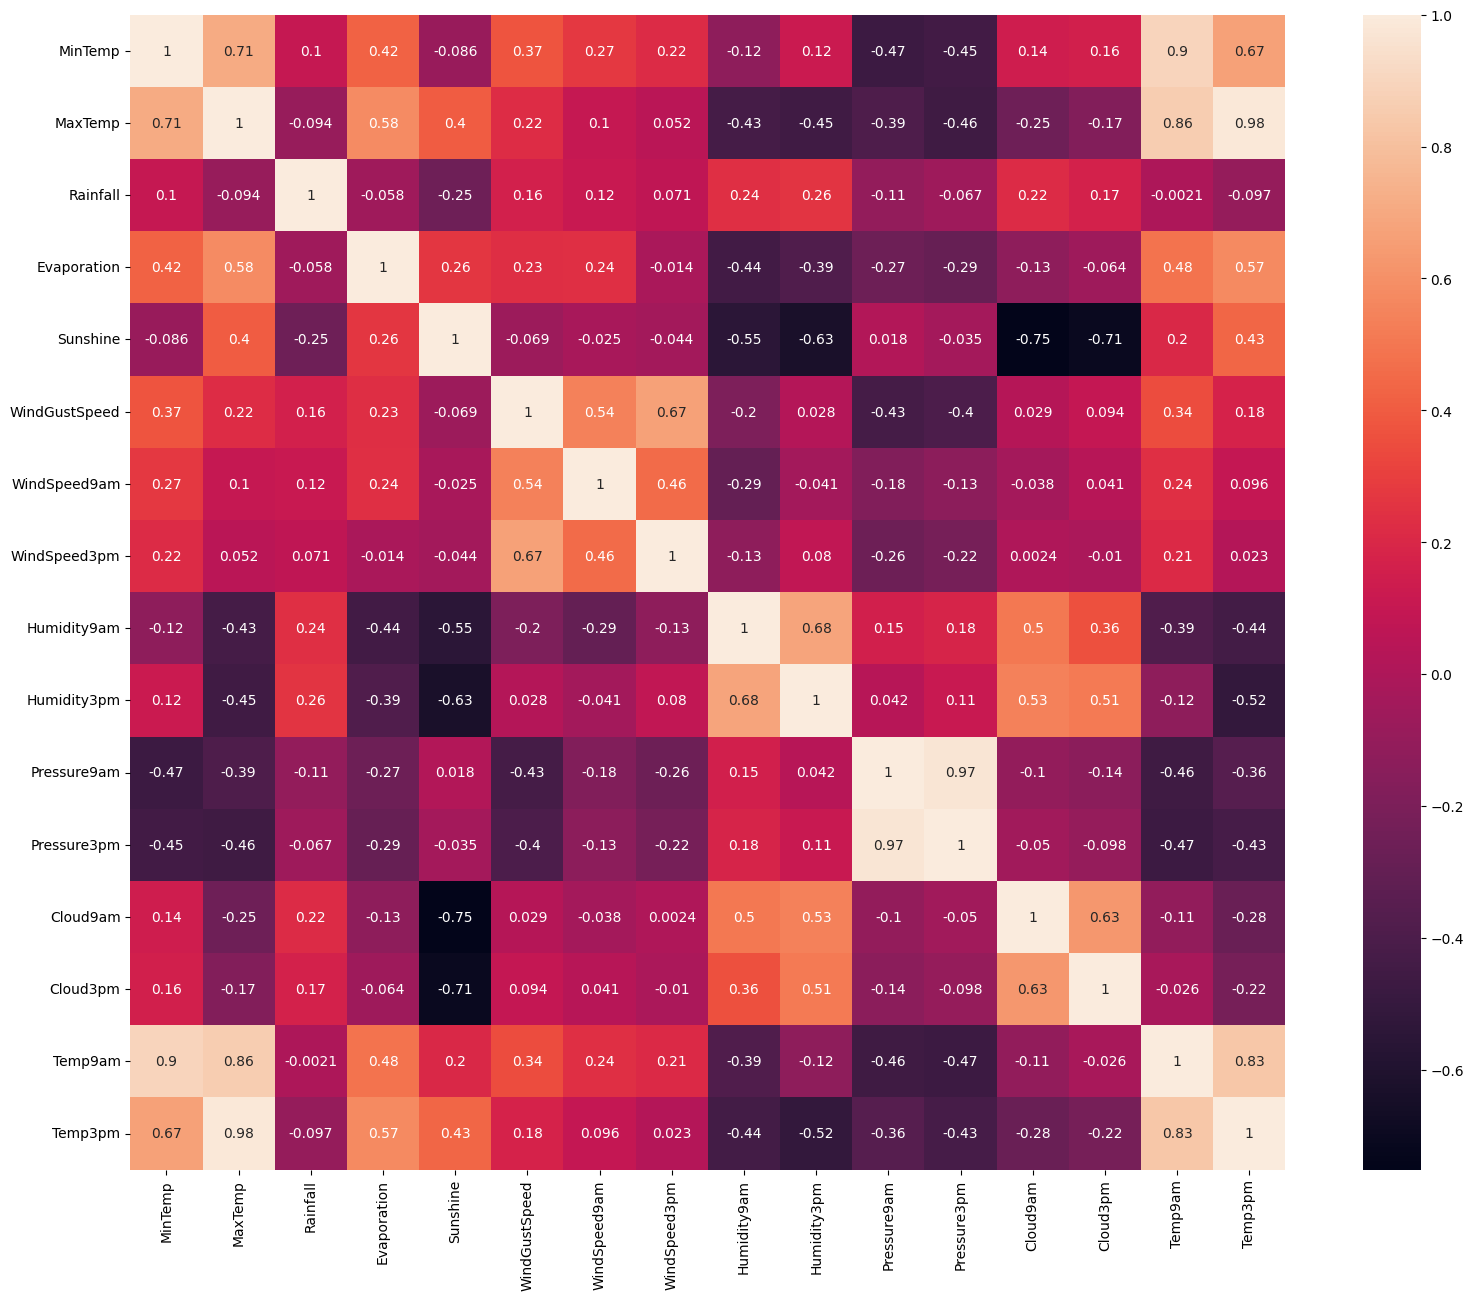

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True, square=True)

In [10]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

10    21900
Name: Date, dtype: int64

In [11]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


In [12]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 3684
WindDir9am 2981
WindDir3pm 1873
RainToday 502
RainTomorrow 502


In [14]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

**Numerical variables**

* Filling missing values with median of the column value

In [15]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [16]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 447
MaxTemp 327
Rainfall 502
Evaporation 14380
Sunshine 17024
WindGustSpeed 3682
WindSpeed9am 711
WindSpeed3pm 1390
Humidity9am 492
Humidity3pm 1186
Pressure9am 3590
Pressure3pm 3586
Cloud9am 9738
Cloud3pm 10050
Temp9am 349
Temp3pm 1037
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [17]:
# Filling missing values with median of the column in value
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           21900 non-null  datetime64[ns]
 1   Location       21900 non-null  object        
 2   MinTemp        21900 non-null  float64       
 3   MaxTemp        21900 non-null  float64       
 4   Rainfall       21900 non-null  float64       
 5   Evaporation    21900 non-null  float64       
 6   Sunshine       21900 non-null  float64       
 7   WindGustDir    21900 non-null  object        
 8   WindGustSpeed  21900 non-null  float64       
 9   WindDir9am     21900 non-null  object        
 10  WindDir3pm     21900 non-null  object        
 11  WindSpeed9am   21900 non-null  float64       
 12  WindSpeed3pm   21900 non-null  float64       
 13  Humidity9am    21900 non-null  float64       
 14  Humidity3pm    21900 non-null  float64       
 15  Pressure9am    2190

In [18]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           21900 non-null  datetime64[ns]
 1   Location       21900 non-null  int64         
 2   MinTemp        21900 non-null  float64       
 3   MaxTemp        21900 non-null  float64       
 4   Rainfall       21900 non-null  float64       
 5   Evaporation    21900 non-null  float64       
 6   Sunshine       21900 non-null  float64       
 7   WindGustDir    21900 non-null  int64         
 8   WindGustSpeed  21900 non-null  float64       
 9   WindDir9am     21900 non-null  int64         
 10  WindDir3pm     21900 non-null  int64         
 11  WindSpeed9am   21900 non-null  float64       
 12  WindSpeed3pm   21900 non-null  float64       
 13  Humidity9am    21900 non-null  float64       
 14  Humidity3pm    21900 non-null  float64       
 15  Pressure9am    2190

In [19]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month_sin,month_cos,day_sin,day_cos
0,-1.494752,0.060705,-0.210159,-0.204053,-0.146794,0.142756,1.308133,0.566339,1.090459,1.490904,...,1.736815,0.173310,-0.177899,-0.149837,-0.515367,-1.844287,-0.023632,1.433287,0.278423,1.426472
1,-1.494752,-0.951654,0.140524,-0.266260,-0.146794,0.142756,1.534919,0.566339,-0.476745,1.724975,...,-0.031840,0.173310,-0.123705,0.266064,-0.515367,-1.844287,-0.023632,1.433287,0.549042,1.340000
2,-1.494752,-0.023658,0.236165,-0.266260,-0.146794,0.142756,1.761705,0.732926,1.090459,1.724975,...,-0.031840,-1.287427,0.562757,0.083068,-0.515367,-1.844287,-0.023632,1.433287,0.797030,1.199820
3,-1.494752,-0.647946,0.602788,-0.266260,-0.146794,0.142756,-0.732944,-1.099531,0.194914,-1.786090,...,-0.031840,0.173310,0.038878,0.632057,-0.515367,-1.844287,-0.023632,1.433287,1.012234,1.011669
4,-1.494752,0.752484,1.288214,-0.162582,-0.146794,0.142756,1.308133,0.316458,-1.596176,-0.147593,...,1.294651,1.634047,-0.015316,1.164411,-0.515367,-1.844287,-0.023632,1.433287,1.185844,0.783252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,1.837013,1.494881,0.299926,-0.266260,0.361328,-0.454458,-1.186517,0.732926,-1.372290,-1.317948,...,1.294651,0.660222,1.140831,0.482333,-0.515367,-0.655043,1.204247,0.727612,-0.145562,-1.392146
21896,1.837013,1.511754,0.443387,-0.266260,-0.400855,-2.734729,-1.186517,0.899513,-1.372290,-1.317948,...,1.294651,1.147134,1.357608,0.382517,-0.515367,-0.655043,1.204247,0.727612,-0.423383,-1.334001
21897,1.837013,1.663608,0.602788,0.086246,-0.464370,-3.820572,-1.413304,-0.016716,-1.820062,-1.552019,...,1.294651,1.147134,1.303414,0.715238,1.940364,-0.655043,1.204247,0.727612,-0.684024,-1.220090
21898,1.837013,1.545499,0.427447,0.169188,-0.019764,0.902846,-1.640090,0.483045,-1.820062,-1.317948,...,-0.031840,0.660222,1.321479,0.415789,1.940364,-0.655043,1.204247,0.727612,-0.916815,-1.055078


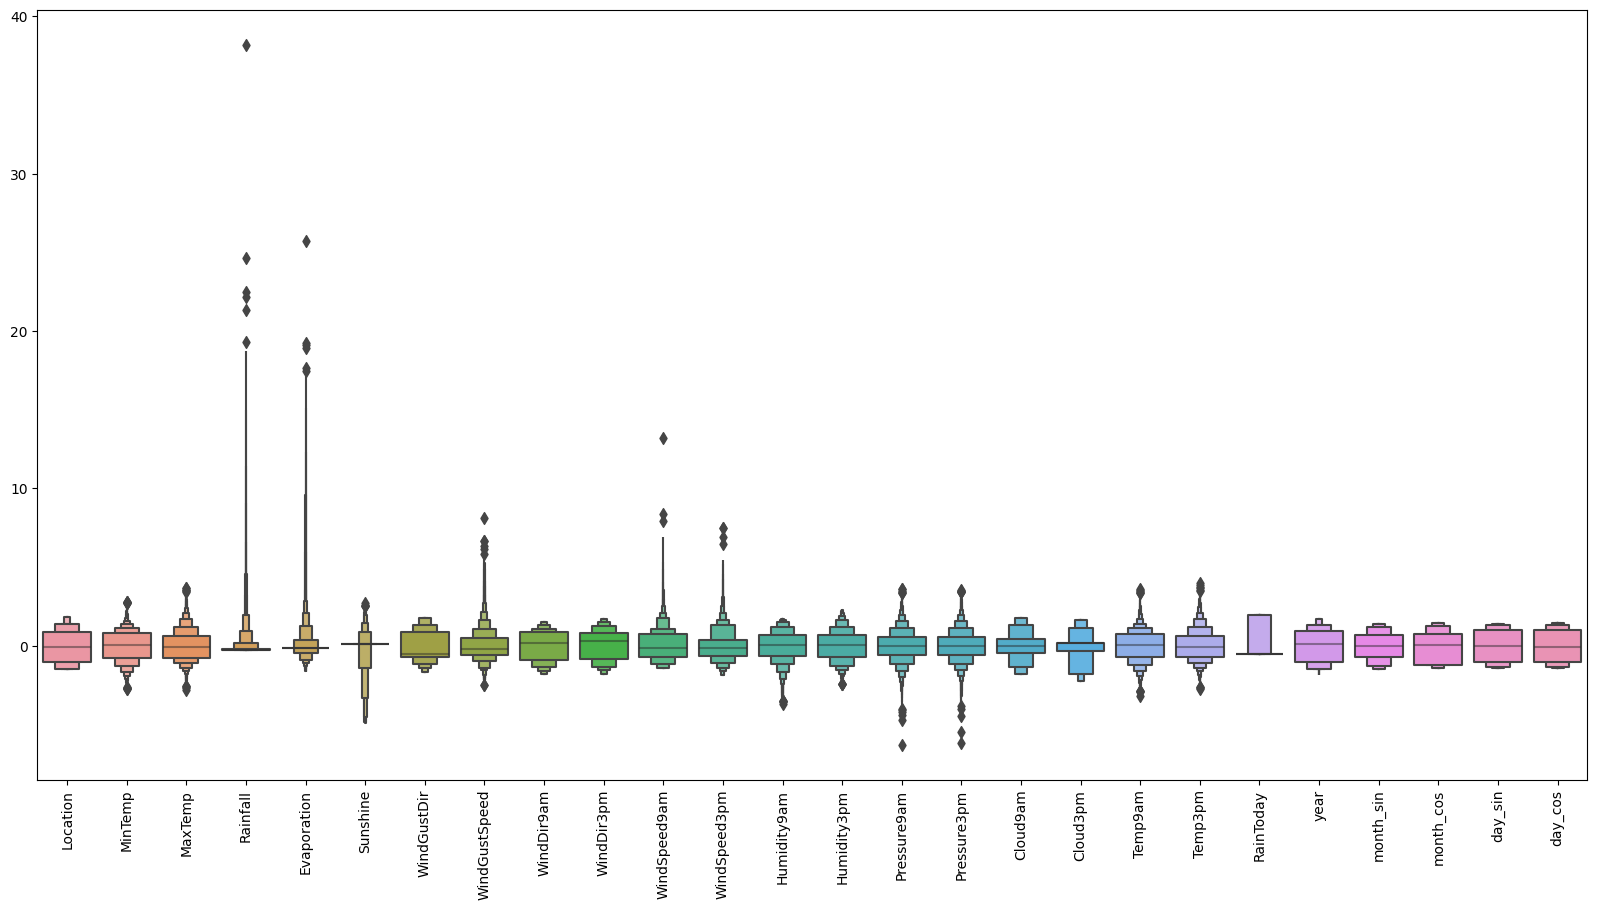

In [20]:
#Detecting outliers
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [21]:
data.iloc[50].value_counts()

0                      4
20.0                   2
2009-01-20 00:00:00    1
1010.1                 1
-0.7907757369376986    1
0.8660254037844387     1
0.49999999999999994    1
1                      1
2009                   1
37.7                   1
26.8                   1
5.0                    1
4.0                    1
1004.8                 1
21.0                   1
36.0                   1
9.0                    1
14                     1
10                     1
61.0                   1
6                      1
9.3                    1
4.8                    1
39.9                   1
18.6                   1
-0.6121059825476627    1
Name: 50, dtype: int64

In [22]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(18794, 27)

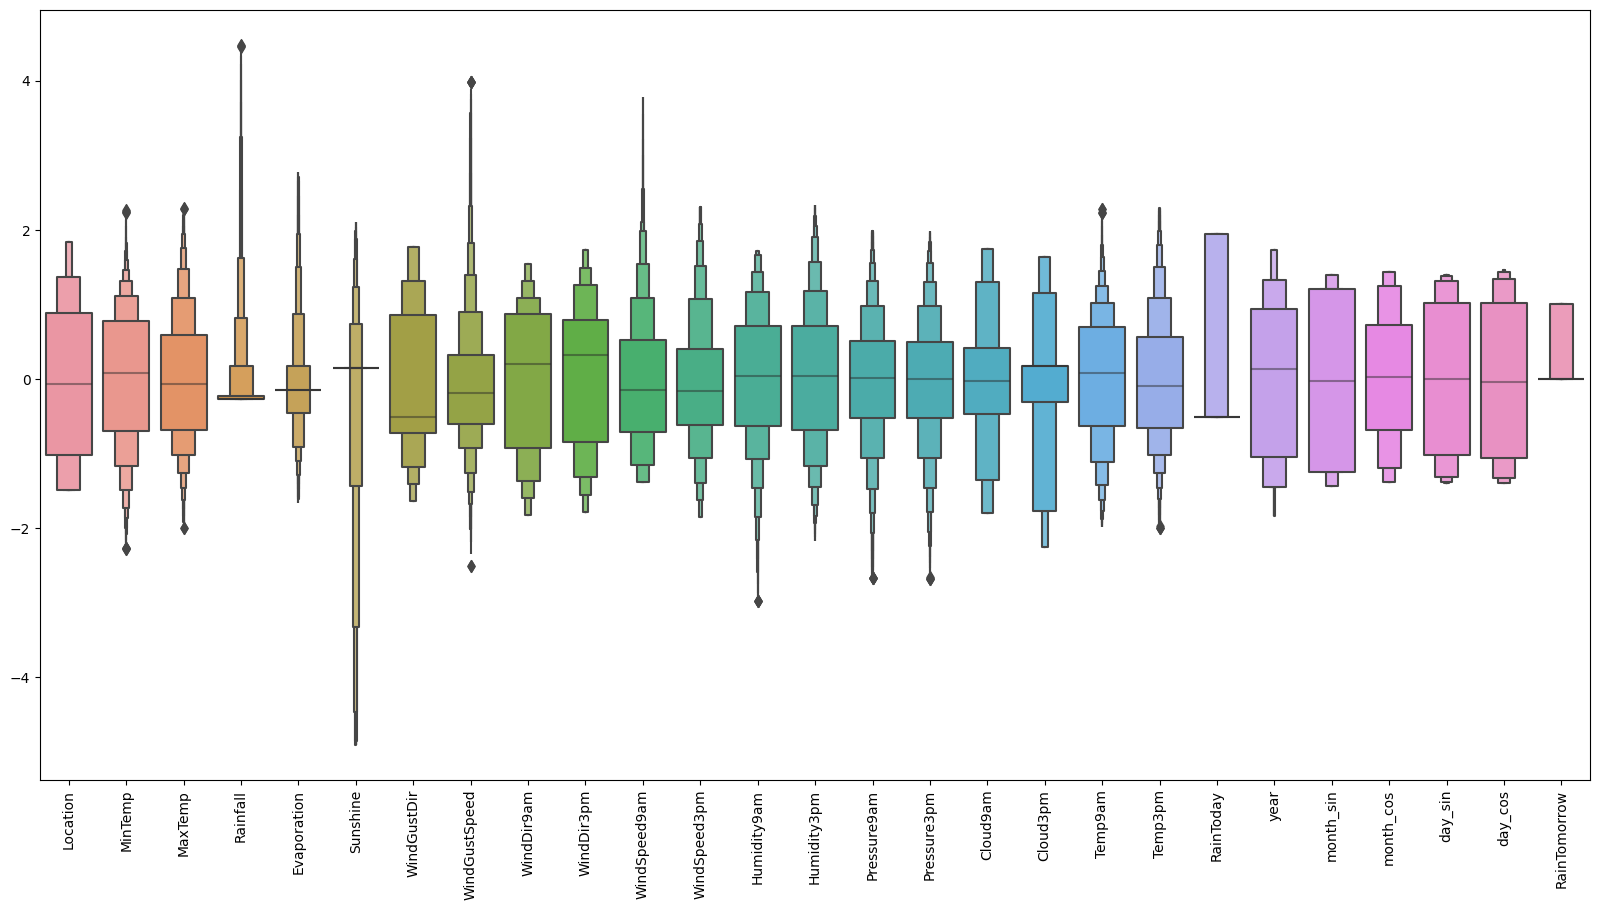

In [23]:

plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [24]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)

X.shape

(18794, 26)

In [25]:
data['RainTomorrow'].value_counts()

0    17303
1     4597
Name: RainTomorrow, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

smt=SMOTE(random_state=42)
X_train,y_train=smt.fit_resample(X_train,y_train)

In [27]:
data['RainTomorrow'].value_counts()

0    17303
1     4597
Name: RainTomorrow, dtype: int64

In [28]:
#step 1   -   Initialise the ANN model
ann= Sequential() 

#step 2   -   Add layers into model
ann.add(Dense(units = 10, activation= "relu"))
ann.add(Dense(units = 8, activation= "relu"))

ann.add(Dense(units=1 , activation= "sigmoid"))

#step 3   -   establish the connection between the layers 
ann.compile(optimizer="adam", loss= "binary_crossentropy")

#step 4   -   Train the Model 
ann.fit(X_train,y_train , batch_size= 30 , epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
799/799 [==============================] - 3s 2ms/step - loss: 0.5422 - val_loss: 0.4811
Epoch 2/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4513 - val_loss: 0.4843
Epoch 3/150
799/799 [==============================] - 3s 4ms/step - loss: 0.4375 - val_loss: 0.4581
Epoch 4/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4315 - val_loss: 0.4698
Epoch 5/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4273 - val_loss: 0.4730
Epoch 6/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4242 - val_loss: 0.4760
Epoch 7/150
799/799 [==============================] - 2s 3ms/step - loss: 0.4215 - val_loss: 0.4697
Epoch 8/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4194 - val_loss: 0.4598
Epoch 9/150
799/799 [==============================] - 2s 3ms/step - loss: 0.4172 - val_loss: 0.4821
Epoch 10/150
799/799 [==============================] - 2s 2ms/step - loss: 0.4158 - val_lo

In [30]:
loss_df=pd.DataFrame(ann.history.history)

<Axes: >

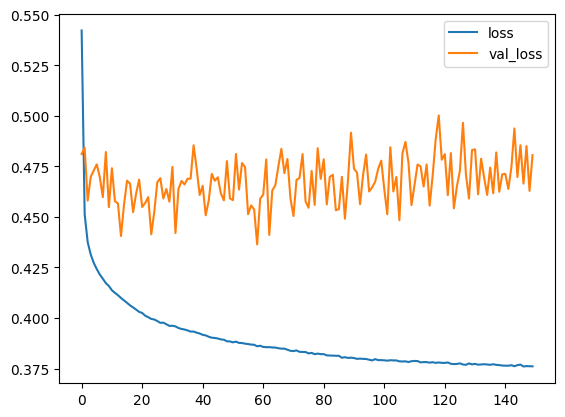

In [31]:
loss_df.plot()

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor= "val_loss", mode="min" , verbose= 1, patience = 25)
ann.fit(X_train, y_train , epochs = 150 , validation_data=(X_test,y_test), callbacks=[earlystop])

Epoch 1/150
749/749 [==============================] - 2s 3ms/step - loss: 0.3758 - val_loss: 0.4729
Epoch 2/150
749/749 [==============================] - 2s 3ms/step - loss: 0.3762 - val_loss: 0.4789
Epoch 3/150
749/749 [==============================] - 1s 2ms/step - loss: 0.3755 - val_loss: 0.4790
Epoch 4/150
749/749 [==============================] - 1s 2ms/step - loss: 0.3760 - val_loss: 0.4875
Epoch 5/150
749/749 [==============================] - 2s 2ms/step - loss: 0.3760 - val_loss: 0.4856
Epoch 6/150
749/749 [==============================] - 1s 2ms/step - loss: 0.3756 - val_loss: 0.4551
Epoch 7/150
749/749 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.4734
Epoch 8/150
749/749 [==============================] - 1s 2ms/step - loss: 0.3763 - val_loss: 0.4736
Epoch 9/150
749/749 [==============================] - 2s 3ms/step - loss: 0.3755 - val_loss: 0.4930
Epoch 10/150
749/749 [==============================] - 2s 2ms/step - loss: 0.3756 - val_lo

<Axes: >

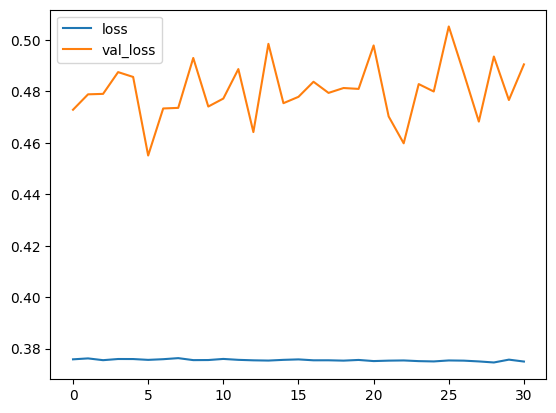

In [33]:
loss_df=pd.DataFrame(ann.history.history)
loss_df.plot()

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
#step 1   -   Initialise the ANN model
ann= Sequential() 

#step 2   -   Add layers into model
ann.add(Dense(units = 10, activation= "relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units = 7, activation= "relu"))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=1 , activation= "sigmoid"))

#step 3   -   establish the connection between the layers 
ann.compile(optimizer="adam", loss= "binary_crossentropy")

In [41]:
ann.fit(X_train,y_train,batch_size= 40, epochs=150 , validation_data = (X_test,y_test) , callbacks= [earlystop])

Epoch 1/150
600/600 [==============================] - 4s 6ms/step - loss: 0.4905 - val_loss: 0.4494
Epoch 2/150
600/600 [==============================] - 2s 3ms/step - loss: 0.4874 - val_loss: 0.4570
Epoch 3/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.4517
Epoch 4/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4897 - val_loss: 0.4502
Epoch 5/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4877 - val_loss: 0.4492
Epoch 6/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4541
Epoch 7/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4879 - val_loss: 0.4507
Epoch 8/150
600/600 [==============================] - 1s 2ms/step - loss: 0.4924 - val_loss: 0.4511
Epoch 9/150
600/600 [==============================] - 2s 3ms/step - loss: 0.4900 - val_loss: 0.4524
Epoch 10/150
600/600 [==============================] - 4s 6ms/step - loss: 0.4914 - val_lo

<Axes: >

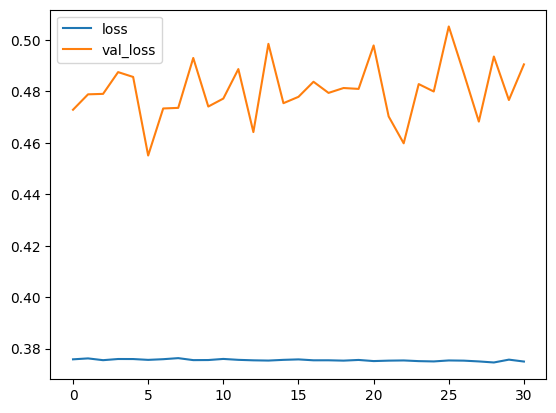

In [42]:
loss_df_2=pd.DataFrame(ann.history.history)
loss_df.plot()

In [43]:
#step 5   -   Make prediction 
ypred = ann.predict(X_test)
ypred

118/118 [==============================] - 0s 1ms/step


array([[0.4320815 ],
       [0.05282881],
       [0.00181622],
       ...,
       [0.70483416],
       [0.60366774],
       [0.7610272 ]], dtype=float32)

In [44]:
from sklearn.metrics import  classification_report 
#step 6   -   Setting thr threshold 
y_n=ypred>0.5
y_n
#step 7   -  Evaluate the model
print(classification_report(y_test,y_n))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2961
           1       0.49      0.74      0.59       798

    accuracy                           0.78      3759
   macro avg       0.71      0.77      0.72      3759
weighted avg       0.83      0.78      0.80      3759



In [45]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
print(confusion_matrix(y_test,y_n))

[[2351  610]
 [ 208  590]]


In [49]:
from tensorflow.keras.models import load_model
ann.save("ANN_fake")
fr=load_model("ANN_fake")


In [63]:
def rain(model):
    Location=float(input('enter Location:'))
    MinTemp=float(input("enter MinTemp:"))
    MaxTemp=float(input("enter MaxTemp: "))
    Rainfall=float(input("enter Rainfall"))
    Evaporation=float(input("enter Evaporation"))
    Sunshine=float(input("enter Coarse Sunshine"))
    WindGustDir=float(input("enter WindGustDir:"))
    WindGustSpeed=float(input("enter WindGustSpeed:"))

    WindDir9am=float(input("enter WindDir9am:"))
    WindDir3pm=float(input("enter  WindDir3pm"))
    WindSpeed9am=float(input("enter WindSpeed9am:"))

    WindSpeed3pm=float(input("enter WindSpeed3pm:"))
    Humidity9am=float(input("enter  Humidity9am"))
    Humidity3pm=float(input("enter Humidity3pm:"))
    Pressure9am=float(input("enter Pressure9am:"))
    Pressure3pm=float(input("enter Pressure3pm:"))
    Cloud9am=float(input("enter Cloud9am:"))
    Cloud3pm=float(input("enter Cloud3pm:"))
    Temp9am=float(input("enter Temp9am:"))
    Temp3pm=float(input("enter Temp3pm:"))
    RainToday=float(input("enter RainToday"))
    year=float(input("enter year:"))
    month_sin=float(input("enter month_sin:"))
    month_cos=float(input("enter month_cos:"))
    day_sin=float(input("enter day_sin:"))
    day_cos=float(input("enter day_cos:"))
    
    newdata=[[Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine,
       WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm,
       WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm,
       Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am,
       Temp3pm, RainToday, year, month_sin, month_cos, day_sin,
       day_cos]]
    yp=fr.predict(newdata)
    if yp>0:
      print('prediction is:yes',yp)

In [61]:
X.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month_sin', 'month_cos', 'day_sin',
       'day_cos'],
      dtype='object')

In [64]:
rain(fr)

enter Location:5
enter MinTemp:6
enter MaxTemp: 7
enter Rainfall6
enter Evaporation5
enter Coarse Sunshine5
enter WindGustDir:5
enter WindGustSpeed:5
enter WindDir9am:5
enter  WindDir3pm5
enter WindSpeed9am:4
enter WindSpeed3pm:3
enter  Humidity9am2
enter Humidity3pm:4
enter Pressure9am:6
enter Pressure3pm:4
enter Cloud9am:7
enter Cloud3pm:5
enter Temp9am:6
enter Temp3pm:5
enter RainToday4
enter year:6
enter month_sin:3
enter month_cos:6
enter day_sin:3
enter day_cos:3
1/1 [==============================] - 0s 79ms/step
prediction is: [[0.89761114]]
